# Image Classification with a Shallow CNN on MNIST

## Set Up the Development Environment

In [1]:
import random

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

## Collect and Process the Data

In [2]:
# Load the MNIST dataset directly from TensorFlow
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

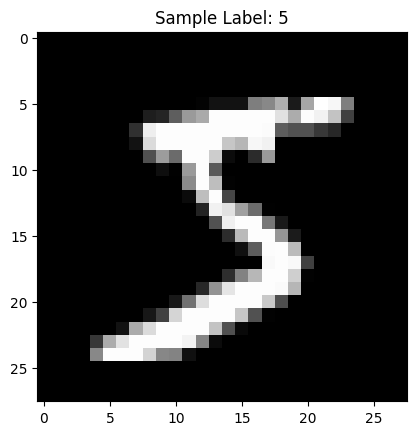

In [3]:
# Normalize the images to the range [0, 1] by dividing by 255
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Reshape images to add the channel dimension (grayscale images have 1 channel)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Convert labels to categorical format (one-hot encoding)
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Display a sample image and label for verification
plt.imshow(train_images[0].reshape(28, 28), cmap="gray")
plt.title(f"Sample Label: {np.argmax(train_labels[0])}")
plt.show()

## Define the Neural Network Architecture

In [4]:
# Define a Sequential model
model = Sequential()

# Add a Convolutional Layer with 32 filters, 3x3 kernel size, ReLU activation, and input shape of 28x28x1
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))

# Add a MaxPooling Layer to reduce the spatial dimensions of the feature maps
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 2D output to 1D before feeding it into the Dense layer
model.add(Flatten())

# Add a Dense Layer with 128 neurons and ReLU activation
model.add(Dense(128, activation="relu"))

# Add the Output Layer with 10 neurons (one per class) and Softmax activation for classification
model.add(Dense(10, activation="softmax"))

# Print the model summary to see the architecture
model.summary()

d:\codes\learn-neural-networks\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

## Compile the Model

In [5]:
model.compile(
    loss="categorical_crossentropy",    # Suitable for multi-class classification
    optimizer="adam",                   # Adam optimizer for efficient training
    metrics=["accuracy"],               # Evaluate the model using accuracy
)

## Train the Model

In [6]:
history = model.fit(
    train_images, train_labels,        # Training data and labels
    validation_split=0.2,              # Use 20% of training data for validation
    epochs=5,                         # Number of training epochs
    batch_size=32,                     # Batch size for each training step
    verbose=1                          # Display progress during training
)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8968 - loss: 0.3468 - val_accuracy: 0.9768 - val_loss: 0.0829
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9820 - loss: 0.0587 - val_accuracy: 0.9824 - val_loss: 0.0602
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9890 - loss: 0.0367 - val_accuracy: 0.9844 - val_loss: 0.0536
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9923 - loss: 0.0258 - val_accuracy: 0.9840 - val_loss: 0.0520
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9955 - loss: 0.0152 - val_accuracy: 0.9862 - val_loss: 0.0553


## Evaluate the Model

Test Accuracy: 0.9867


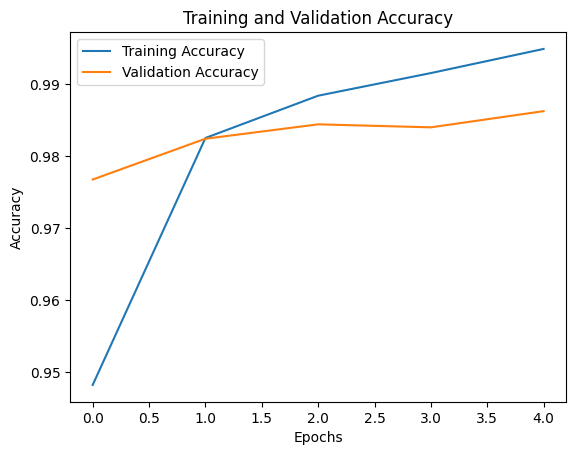

In [7]:
# Evaluate the model on the test set to see how well it performs on unseen data
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plotting the training and validation accuracy over epochs
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

## Predict and Visualize Results

In [8]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [9]:
# Get the predicted and true labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Calculate the number of correct predictions
correct = np.sum(predicted_labels == true_labels)

# Calculate the number of incorrect predictions
incorrect = len(predictions) - correct

# Display the count of correct and incorrect predictions
print(f"Correct Predictions: {correct}")
print(f"Incorrect Predictions: {incorrect}")

# Display the accuracy of the model
accuracy = correct / len(predictions)
print(f"Accuracy: {accuracy:.4f}")

Correct Predictions: 9867
Incorrect Predictions: 133
Accuracy: 0.9867


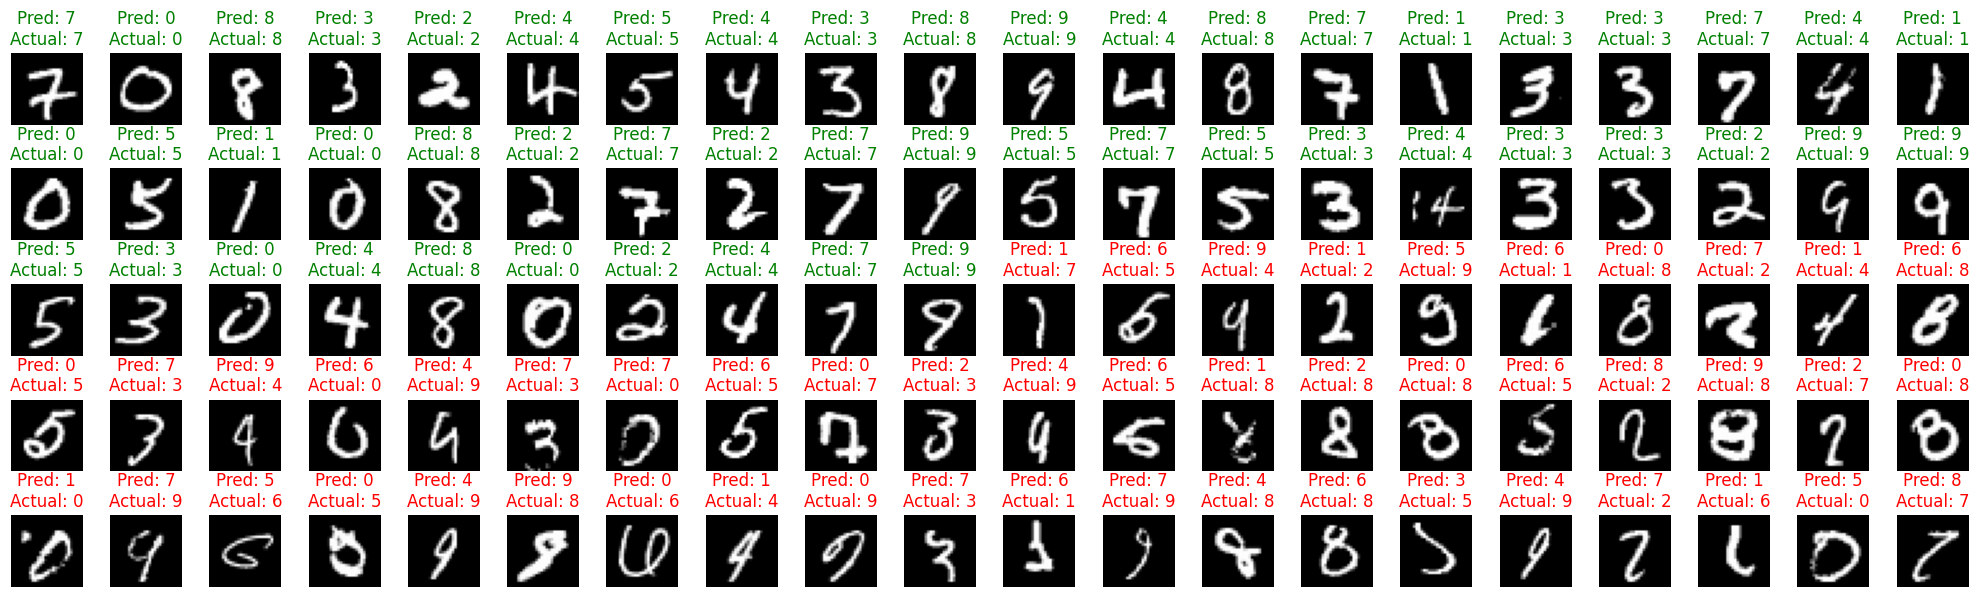

In [10]:
# Number of images to display
num_images = 100
num_cols = 20
num_rows = num_images // num_cols

# Separate correct and incorrect predictions
correct_predictions = []
incorrect_predictions = []

for i in range(len(test_images)):
    predicted_label = np.argmax(predictions[i])
    actual_label = np.argmax(test_labels[i])
    if predicted_label == actual_label:
        correct_predictions.append(i)
    else:
        incorrect_predictions.append(i)

# Randomly sample half the images from each set
sampled_correct = random.sample(correct_predictions, num_images // 2)
sampled_incorrect = random.sample(incorrect_predictions, num_images // 2)
sampled_indices = sampled_correct + sampled_incorrect

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 6))

# Display images with predicted and actual labels
for idx, i in enumerate(sampled_indices):
    row = idx // num_cols
    col = idx % num_cols
    axes[row, col].imshow(test_images[i].reshape(28, 28), cmap="gray")

    # Determine if the prediction is correct
    predicted_label = np.argmax(predictions[i])
    actual_label = np.argmax(test_labels[i])
    color = "green" if predicted_label == actual_label else "red"

    # Set the title with color coding
    axes[row, col].set_title(f"Pred: {predicted_label}\nActual: {actual_label}", color=color)
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()